# This is verifying and investing issue 23. 

In [187]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

## basic test.

In [17]:
a = np.array([0,1,0,2,3,0,5,6,0,8,9,0,8])
b = np.array([11,12,0,12,13,0,15,16,0,18,19,0,18])

# older
a_old = a[np.where(a>0)]
b_old = b[np.where(a_old>0)]


# new
a_new = a[np.where(a>0)]
b_new = b[np.where(a>0)]
b_old,b_new


(array([11, 12,  0, 12, 13,  0, 15, 16]),
 array([12, 12, 13, 15, 16, 18, 19, 18]))

In [25]:
np.where(a>0), np.where(a_old>0)

((array([ 1,  3,  4,  6,  7,  9, 10, 12]),),
 (array([0, 1, 2, 3, 4, 5, 6, 7]),))

In [143]:
file_path = "/Users/swasti/Library/CloudStorage/Box-Box/ComPair/Tests_and_Debug/debug-issue23/Dec5_R300.CUD.h5"
file = h5py.File(file_path,'r')

In [144]:
file['Events/CZT'].keys()

<KeysViewHDF5 ['AnodePulseheight', 'AnodeTime', 'AsicTemp', 'BadPadflag', 'CathodePulseheight', 'CathodeTime', 'CorUTC', 'Energy', 'EventID', 'EventTime', 'PadPulseheight', 'Position']>

In [145]:
czt_nrg_val = file['Events/CZT/Energy'][...]

In [146]:
czt_event_ids = file['Events/CZT/EventID'][...]
czt_event_ids.shape

(6613967,)

In [147]:
fil_indices = np.where(czt_event_ids>0)

## Old

In [148]:
old_czt_eventid = czt_event_ids[fil_indices]
old_czt_nrg = czt_nrg_val[np.where(old_czt_eventid>0)]
old_czt_nrg.shape

(407364, 16, 16)

In [149]:
czt_event_ids_0 = czt_event_ids[(np.where(old_czt_eventid>0))]
czt_event_ids_0.shape

(407364,)

In [150]:
np.shape(np.where(czt_event_ids_0 ==0))

(1, 380394)

In [151]:
old_czt_nrg_0 = old_czt_nrg[np.where(czt_event_ids_0 ==0)]
old_czt_nrg_0_sum =old_czt_nrg_0.sum(axis = tuple(range(1,3)) )
old_czt_nrg_0.shape, old_czt_nrg_0_sum.shape

((380394, 16, 16), (380394,))

In [152]:
old_czt_nrg_1 = old_czt_nrg[np.where(czt_event_ids_0>0)]
old_czt_nrg_1_sum =old_czt_nrg_1.sum(axis = tuple(range(1,3)) )
old_czt_nrg_1.shape, old_czt_nrg_1_sum.shape

((26970, 16, 16), (26970,))

Text(0.5, 1.0, 'OLD CZT Energy separated by event ids')

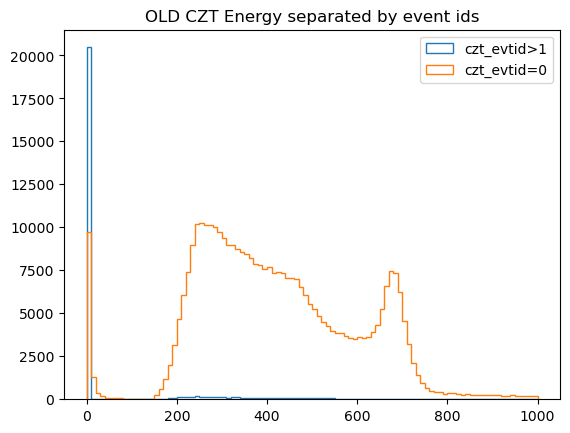

In [153]:
plt.hist(old_czt_nrg_1_sum,range=[0,1000],bins=100,histtype='step', label='czt_evtid>1')
plt.hist(old_czt_nrg_0_sum,range=[0,1000],bins=100,histtype='step', label='czt_evtid=0')
plt.legend()
plt.title('OLD CZT Energy separated by event ids')

## Testing with statistics. 

In [154]:
file['Events'].keys()

<KeysViewHDF5 ['ACD', 'CZT', 'CsI', 'TKR']>

In [155]:
trk_evtid = file['Events/TKR/EventID'][...]        #Note, not all event ids would be present in nrg.
trk_nrg = file["Events/TKR/Energy"][...]
trk_nr_id =trk_nrg[:,0]   # Tracker ID from the energy dataset 
trk_evt =  trk_nr_id
len(trk_evt), len(np.unique(trk_evt)), len(trk_evtid)

(344529, 157599, 410524)

In [156]:
czt_evta= file['Events/CZT/EventID'][...]
czt_nrga = file["Events/CZT/Energy"][...]

czt_evt = czt_evta[np.where(czt_evta>0)]
czt_nrg = czt_nrga[np.where(czt_evta>0)]
len(czt_evta), len(czt_evt)

(6613967, 407364)

In [157]:
czt_nrg_sum = np.sum(czt_nrg,axis = (1,2)) 
czt_nrg.shape, czt_nrg_sum.shape

((407364, 16, 16), (407364,))

In [158]:
t_arr2= czt_nrg_sum[np.where(czt_nrg_sum>0)]
czt_evtid_nonzero_nrg = czt_evt[np.where(czt_nrg_sum>0)] 
t_arr2.shape, czt_evtid_nonzero_nrg.shape

((90525,), (90525,))

In [159]:
csi_evt= file['Events/CsI/EventID/EventID'][...]
csi_nrg = file["Events/CsI/erg"][...]
csi_nrg_sum = csi_nrg.sum(axis = tuple(range(1,2)) )
 
len(csi_evt), len(csi_nrg), len(csi_nrg_sum), csi_nrg.shape

(83554, 83554, 83554, (83554, 30))

In [160]:
t_arr = csi_nrg_sum[np.where(csi_nrg_sum>1)]
csi_evtid_nonzero_nrg = csi_evt[np.where(csi_nrg_sum>0)] 

t_arr.shape,csi_evtid_nonzero_nrg.shape

((60597,), (60597,))

In [161]:
acd_evt= file['Events/ACD/EventID'][...]
acd_nrg= file['Events/ACD/Energy'][...]
acd_nrg_sum = acd_nrg.sum(axis = tuple(range(1,2)) )
len(acd_evt), len(acd_nrg), acd_nrg.shape, acd_nrg_sum

(105817,
 105817,
 (105817, 5),
 array([13017.609 ,  3454.5403,  3358.3445, ...,  5571.9624, 10244.133 ,
         6482.9326], dtype=float32))

In [162]:
t_arr1 = acd_nrg_sum[np.where(acd_nrg_sum>1)]
acd_evtid_nonzero_nrg = acd_evt[np.where(acd_nrg_sum>0)] 

t_arr1.shape, acd_evtid_nonzero_nrg.shape

((105483,), (105483,))

In [163]:
delme_arr = np.union1d(trk_evt,czt_evt)
delme_arr1= np.union1d(delme_arr,acd_evt)
uniq_evt_id_arr = np.union1d(delme_arr1,csi_evt)
n_evts = uniq_evt_id_arr.shape[0]
n_evts

493068

In [164]:
delme_arr_temp = np.union1d(trk_evt,czt_evtid_nonzero_nrg)
delme_arr1_temp= np.union1d(delme_arr_temp,acd_evtid_nonzero_nrg)
uniq_evt_id_nonzero = np.union1d(delme_arr1_temp,csi_evtid_nonzero_nrg)
n_evts_a = uniq_evt_id_nonzero.shape[0]
n_evts_a

315317

### Test evta no. of events

In [165]:
evta_file ="/Users/swasti/Downloads/R300_ACD-high-threshold_CZTcut.evta"

In [166]:
efile  = open(evta_file,'r')
lines = efile.readlines()
efile.close()

In [167]:
counter =0
czt_flag = False
czt_counter = 0
for line in lines:
    if 'ID' in line:
        counter+=1
        if czt_flag == True:
            czt_counter+=1
        czt_flag=False
    if 'HTsim 1' in line:
        czt_flag = True
    
    
counter, czt_counter

(314689, 157599)

In [168]:
or line in old_lines:
    if 'ID' in line:
        eid = float(line.split(' ')[-1].strip())
        old_eid.append(eid)
        if tot_nrg != 0:
            TKR_old.append(TKR_nrg)
            CZT_old.append(CZT_nrg)
            CsI_old.append(CsI_nrg)
            total_old.append(tot_nrg)
        TKR_nrg = 0
        CZT_nrg = 0
        CsI_nrg = 0
        tot_nrg = 0
    if 'HTsim 1' in line:
        e = float(line.split(';\t')[4].strip())
        TKR_nrg += e
        tot_nrg += e
    if 'HTsim 7' in line:
        e = float(line.split(';\t')[4].strip())
        CZT_nrg += e
        tot_nrg += e
    if 'HTsim 2' in line:
        e = float(line.split(';\t')[4].strip())
        CsI_nrg += e
        tot_nrg += e

SyntaxError: invalid syntax (2415665298.py, line 1)

In [86]:
a = np.array([0,1,1,2,2,3,4,5,6])
b = np.array([4,5,6,7])
np.union1d(a,b)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [176]:
evtid = 2147483660
np.where(czt_evt==evtid), np.where(trk_evtid ==evtid), np.where(trk_nr_id==evtid)

((array([12]),), (array([10]),), (array([], dtype=int64),))

In [175]:
trk_nrg[10]

array([ 2.14748366e+09,  4.02900000e+00, -1.42800000e+00,  1.14250000e+01,
        1.81470650e+02,  1.00000000e+00])

In [173]:
czt_evt[12], czt_nrg[12]

(2147483660,
 array([[  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
           0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
           0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
           0.       ],
        [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
           0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
           0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
           0.       ],
        [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
           0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
           0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
           0.       ],
        [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
           0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
           0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
           0.       ],
       

In [177]:
evta_file = "/Users/swasti/Library/CloudStorage/Box-Box/ComPair/Tests_and_Debug/debug-issue23/Dec5_R300.evta"

In [178]:
efile = open(evta_file,'r')
lines = efile.readlines()
efile.close()

In [185]:
tot_evt = 0

tkr_flag = False
tkr_cnt = 0

csi_flag = False
csi_cnt = 0

czt_flag = False
czt_cnt = 0

acd_flag = False
acd_cnt = 0

for line in lines:
    
    if 'ID' in line:
        tot_evt+=1

        if tkr_flag:
            tkr_cnt +=1
            tkr_flag = False

        if csi_flag:
            csi_cnt +=1
            csi_flag = False

        if czt_flag:
            czt_cnt +=1
            czt_flag = False

        if acd_flag:
            acd_cnt +=1
            acd_flag = False

    if 'HTsim 1' in line:
        tkr_flag = True

    if 'HTsim 2' in line:
        csi_flag = True

    if 'HTsim 7' in line:
        czt_flag = True
        
    if 'HTsim 4' in line:
        acd_flag = True

In [186]:
tot_evt, tkr_cnt, csi_cnt, acd_cnt, czt_cnt

(315099, 157599, 60596, 105483, 90084)

# Testing few execution commands 

In [188]:
dstart = datetime.utcnow() # Start time to calculate execution of script.
dend = datetime.utcnow()
(dend-dstart).total_seconds()    

3.1e-05

In [189]:
trk_nrg = file["Events/TKR/Energy"][...]
trk_evtid = file['Events/TKR/EventID'][...]        #Note, not all event ids would be present in nrg.


In [191]:
dstart = datetime.utcnow() # Start time to calculate execution of script.
trk_nr_id =trk_nrg[:,0]   # Tracker ID from the energy dataset 
trk_evt =  trk_nr_id
dend = datetime.utcnow()
(dend-dstart).total_seconds()    

9.6e-05

In [193]:
dstart = datetime.utcnow() # Start time to calculate execution of script.

trk_indices = []
for value in trk_evt:
    # Find the indices where the value matches in trk_eventid
    indices = np.where(trk_evtid == value)[0]
    # Extend trk_indices with these indices
    trk_indices.extend(indices)
trk_indices = np.array(trk_indices)

dend = datetime.utcnow()
(dend-dstart).total_seconds() 

138.988729

In [200]:
trk_indices.shape, trk_evt.shape, trk_evtid.shape, np.unique(trk_evt).shape


((344529,), (344529,), (410524,), (157599,))

In [197]:
indices_a_matching_b = np.where(np.isin(trk_evtid, trk_evt))[0]     
indices_a_matching_b.shape
        

(157599,)